In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dems = pd.read_csv('../datasets/dem_candidates.csv')
dems.head()

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Partisan Lean,...,Biden Endorsed?,Warren Endorsed?,Sanders Endorsed?,Our Revolution Endorsed?,Justice Dems Endorsed?,PCCC Endorsed?,Indivisible Endorsed?,WFP Endorsed?,VoteVets Endorsed?,No Labels Support?
0,Anthony White (Alabama),AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Christopher Countryman,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Doug ""New Blue"" Smith",AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,James C. Fields,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sue Bell Cobb,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning

In [25]:
dems = dems.rename(columns={'Warren Endorsed? ': 'Warren Endorsed?', 'Guns Sense Candidate?': 'Gun Sense Candidate?'})
endorsement_cols = dems.columns[pd.Series(dems.columns).str.contains('Endorsed')].values
endorsement_cols = np.append(endorsement_cols, 'Gun Sense Candidate?')
endorsement_cols = np.append(endorsement_cols, 'Party Support?')
# endorsement_cols = np.append(endorsement_cols, 'Obama Alum?')
# endorsement_cols = np.append(endorsement_cols, 'No Labels Support?')
dems[endorsement_cols] = dems[endorsement_cols].replace({'No': 0, 'Yes': 1})
dems['Total Endorsements'] = dems[endorsement_cols].sum(axis=1)
dems['Endorsed'] = (dems['Total Endorsements'] > 0).astype(int)
dems['Won_int'] = (dems['Won Primary'] == 'Yes').astype(int)

In [26]:
dems.head()

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Partisan Lean,...,Our Revolution Endorsed?,Justice Dems Endorsed?,PCCC Endorsed?,Indivisible Endorsed?,WFP Endorsed?,VoteVets Endorsed?,No Labels Support?,Total Endorsements,Endorsed,Won_int
0,Anthony White (Alabama),AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0
1,Christopher Countryman,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0
2,"Doug ""New Blue"" Smith",AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0
3,James C. Fields,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0
4,Sue Bell Cobb,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0


In [27]:
winners = dems[dems['Primary Status'] == 'Advanced']
winners.head()

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Partisan Lean,...,Our Revolution Endorsed?,Justice Dems Endorsed?,PCCC Endorsed?,Indivisible Endorsed?,WFP Endorsed?,VoteVets Endorsed?,No Labels Support?,Total Endorsements,Endorsed,Won_int
5,Walt Maddox,AL,Governor of Alabama,Governor,Regular,6/5/18,Advanced,None,On the Ballot,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1,1
7,Robert Kennedy Jr.,AL,U.S. House Alabama District 1,Representative,Regular,6/5/18,Advanced,None,On the Ballot,-30.680000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,1
9,Tabitha Isner,AL,U.S. House Alabama District 2,Representative,Regular,6/5/18,Advanced,None,On the Ballot,-33.080002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,1
11,Mallory Hagan,AL,U.S. House Alabama District 3,Representative,Regular,6/5/18,Advanced,None,On the Ballot,-33.660000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1,1
12,Lee Auman,AL,U.S. House Alabama District 4,Representative,Regular,6/5/18,Advanced,None,On the Ballot,-62.480000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1,1


# EDA

In [28]:
dems[dems['Race Type'] == 'Special'] # just realized there's special races in this df too... what to do with them?

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Partisan Lean,...,Our Revolution Endorsed?,Justice Dems Endorsed?,PCCC Endorsed?,Indivisible Endorsed?,WFP Endorsed?,VoteVets Endorsed?,No Labels Support?,Total Endorsements,Endorsed,Won_int
25,Brianna Westbrook,AZ,U.S. House Arizona District 8,Representative,Special,2/27/18,Lost,None,None,-24.559999,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,3.0,1,0
26,Hiral Tipirneni,AZ,U.S. House Arizona District 8,Representative,Special,2/27/18,Advanced,None,On the Ballot,-24.559999,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0,1
305,Bill Wild,MI,U.S. House Michigan District 13,Representative,Special,8/7/18,Lost,None,None,60.720001,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0,0
306,Brenda Jones,MI,U.S. House Michigan District 13,Representative,Special,8/7/18,Advanced,None,On the Ballot,60.720001,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0,1
310,Ian Conyers,MI,U.S. House Michigan District 13,Representative,Special,8/7/18,Lost,None,None,60.720001,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0,0
312,Rashida Tlaib,MI,U.S. House Michigan District 13,Representative,Special,8/7/18,Lost,None,None,60.720001,...,1.0,1.0,1.0,NaN,NaN,NaN,No,4.0,1,0
500,Danny O'Connor,OH,U.S. House Ohio District 12,Representative,Special,5/8/18,Advanced,None,On the Ballot,-13.630000,...,NaN,0.0,NaN,1.0,NaN,NaN,NaN,3.0,1,1
503,Doug Wilson,OH,U.S. House Ohio District 12,Representative,Special,5/8/18,Lost,None,None,-13.630000,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0,0
505,Ed Albertson,OH,U.S. House Ohio District 12,Representative,Special,5/8/18,Lost,None,None,-13.630000,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0,0
507,Jackie Patton,OH,U.S. House Ohio District 12,Representative,Special,5/8/18,Lost,None,None,-13.630000,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,2.0,1,0


## Just the numbers

### Numerical Visualization 1

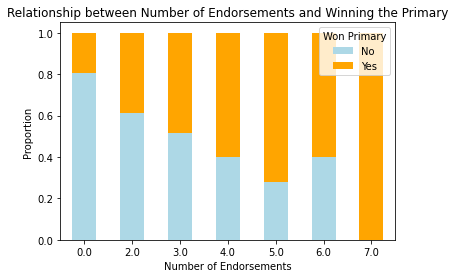

In [29]:
prop_df = dems.groupby(['Total Endorsements', 'Won Primary']).size().unstack(fill_value=0)
prop_df = prop_df.div(prop_df.sum(axis=1), axis=0)

prop_df.plot(kind='bar', stacked=True, color=['lightblue', 'orange'])
plt.title('Relationship between Number of Endorsements and Winning the Primary')
plt.xlabel('Number of Endorsements')
plt.ylabel('Proportion')
plt.legend(title='Won Primary', loc='upper right', labels=['No', 'Yes'])
plt.xticks(rotation=0)

plt.show();

When counting the "number of endorsements," we included `'Emily Endorsed?'`, `'Biden Endorsed?'`, `'Warren Endorsed?'`, `'Sanders Endorsed?'`, `'Our Revolution Endorsed?'`, `'Justice Dems Endorsed?'`, `'PCCC Endorsed?'`, `'Indivisible Endorsed?'`, `'WFP Endorsed?'`, `'VoteVets Endorsed?'`, `'Gun Sense Candidate?'`, and `'Party Support?'`. We opted to exclude `No Labels Support?` because, according to the dataset description, this feature tracked whether or not a candidate received financial support from a No Labels-affiliated group. We also excluded `Obama Alum?` because it is unclear whether that had the same weight as an explicit endorsement from a political candidate, party, or organization.

From this bar plot, we observe that the proportion of candidates who won their primary race generally increases with the number of endorsements received. Beyond this, we would like to explore whether different endorsements carried different weights. For example, do endorsements from high-profile Democratic presidential candidates—namely, Joe Biden, Bernie Sanders, and Elizabeth Warren—have a greater effect on a candidate's performance compared to endorsements from political organizations and PACs? Alternatively, does the impact of each endorsement change based on the political lean of the district? For example, would an endorsement from Sanders or Warren have a larger impact than an endorsement from Biden in a more left-leaning district?

This visualization is relevant to our second research question, where we aim to explore whether there exists a causal effect of endorsements on primary success. Although this visualization alone is not enough establish causality, it reveals that an association does seem to exist between receiving more endorsements and succeeding in the primary. Therefore, we see that the political endorsement question is worthy of further investigation.

### Numerical Visualization 2

In [30]:
melt_df = dems.melt(id_vars='Candidate', value_vars=endorsement_cols, var_name='Endorser', value_name='Endorsed?')
violin_df = melt_df.merge(dems[['Candidate', 'Partisan Lean', 'Primary %', 'Won_int']], how='left', on='Candidate')
violin_filt = violin_df[violin_df['Endorsed?'] == 1.0]

In [31]:
violin_filt

,Candidate,Endorser,Endorsed?,Partisan Lean,Primary %,Won_int
48,Virginia Madueno,Emily Endorsed?,1.0,0.620000,19.170000,0
59,Katie Hill,Emily Endorsed?,1.0,2.020000,42.970001,1
64,Mai Khanh Tran,Emily Endorsed?,1.0,2.990000,11.690000,0
75,Katie Porter,Emily Endorsed?,1.0,-1.430000,44.040001,1
83,Rachel Payne,Emily Endorsed?,1.0,-4.180000,4.490000,0
...,...,...,...,...,...,...
10721,Gina Ortiz Jones,Party Support?,1.0,-0.630000,41.560001,1
10756,Colin Allred,Party Support?,1.0,-4.980000,38.430000,1
10787,Ben McAdams,Party Support?,1.0,-16.809999,100.000000,1
10798,Elaine Luria,Party Support?,1.0,-5.660000,62.330002,1


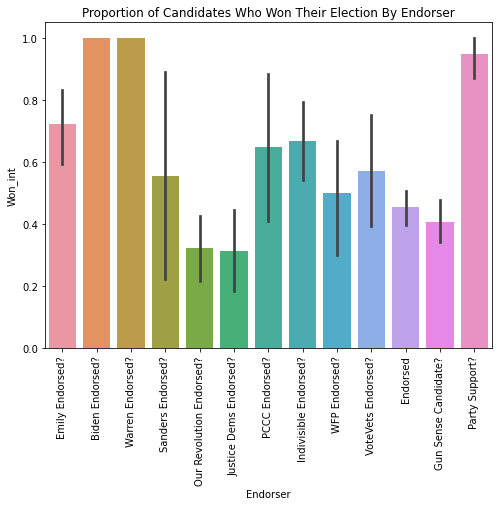

In [34]:
plt.figure(figsize=(8, 6))
sns.barplot(data=violin_filt, x="Endorser", y="Won_int")
plt.xticks(rotation=90)
plt.title('Proportion of Candidates Who Won Their Election By Endorser');

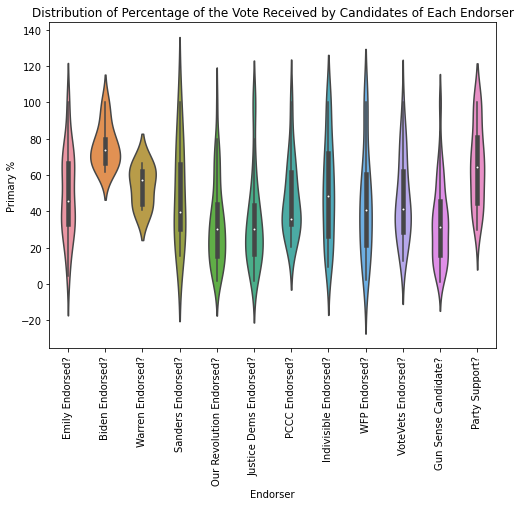

In [41]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=violin_filt, x="Endorser", y="Primary %")
plt.xticks(rotation=90)
plt.title('Distribution of Percentage of the Vote Received by Candidates of Each Endorser');

For each endorser, we plotted out the distribution of the percentage of the vote the endorsed candidates received in their primary race. From this violin plot, we can point out which endorsers were associated with more successful candidates. Looking at the visualization, we can see that the vote percentages received by candidates endorsed by Joe Biden and Elizabeth Warren were higher, on average, and their distributions appear to have less spread. Receiving support from the Democratic Party itself also resulted in a relatively high average vote percentage. Interestingly, being Sanders-endorsed candidates received the lowest percentages of votes out of the three major politician endorsers, on average. Unsurprisingly to us, the organizations/PACs appear to be less impactful than the politicians. The organization associated with the highest average vote percentage is Indivisible, while Gun Sense, Our Revolution, and Justice Dems were the lowest. While this violin plot alone is not enough to establish causal claims (maybe Biden and Warren picked their candidates strategically), we aim to explore this relationship in greater detail.

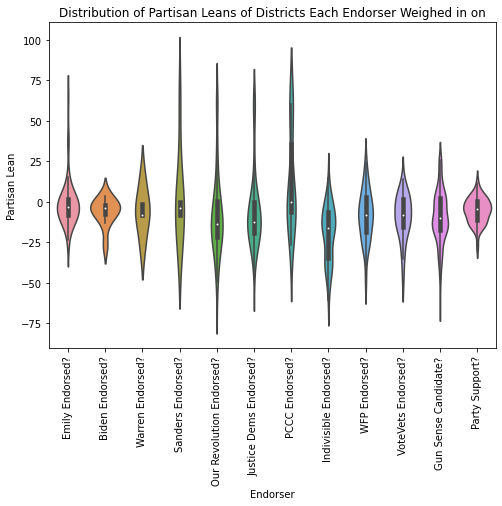

In [9]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=violin_filt, x="Endorser", y="Partisan Lean")
plt.xticks(rotation=90)
plt.title('Distribution of Partisan Leans of Districts Each Endorser Weighed in on');

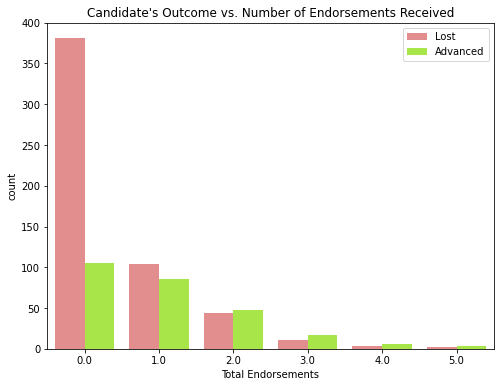

In [6]:
plt.figure(figsize=(8, 6))
colours = {'Lost': 'lightcoral', 'Advanced': 'greenyellow'}
sns.countplot(data=dems, x='Total Endorsements', hue='Primary Status', palette=colours)
plt.title("Candidate's Outcome vs. Number of Endorsements Received")
plt.legend(loc='upper right');

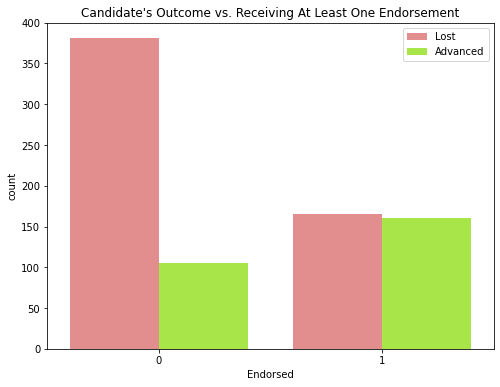

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(data=dems, x='Endorsed', hue='Primary Status', palette=colours)
plt.title("Candidate's Outcome vs. Receiving At Least One Endorsement")
plt.legend(loc='upper right');

More candidates with at least one endorsement advanced, and the more endorsements, the better.

## Biden

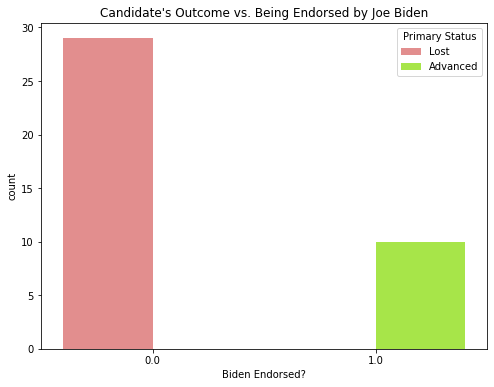

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(data=dems, x='Biden Endorsed?', hue='Primary Status', palette=colours)
plt.title("Candidate's Outcome vs. Being Endorsed by Joe Biden");

All Biden-endorsed candidates advanced, and all Biden-anti-endorsed or candidates running against a Biden-endorsed candidate lost.

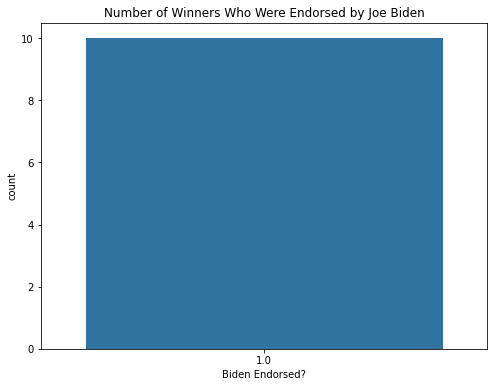

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(data=winners, x='Biden Endorsed?')
plt.title("Number of Winners Who Were Endorsed by Joe Biden");

## Sanders

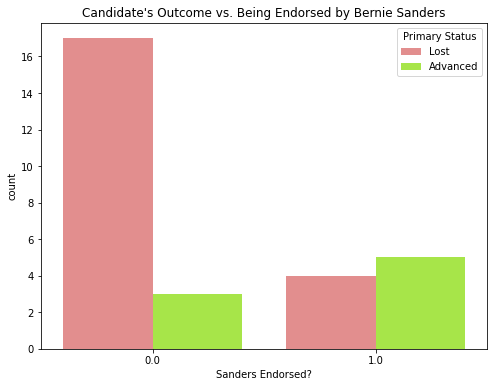

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(data=dems, x='Sanders Endorsed?', hue='Primary Status', palette=colours)
plt.title("Candidate's Outcome vs. Being Endorsed by Bernie Sanders");

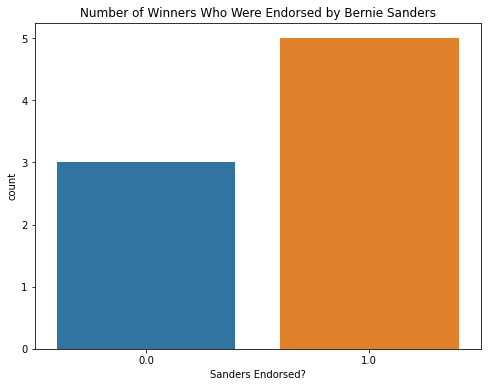

In [29]:
plt.figure(figsize=(8, 6))
sns.countplot(data=winners, x='Sanders Endorsed?')
plt.title("Number of Winners Who Were Endorsed by Bernie Sanders");

## Warren

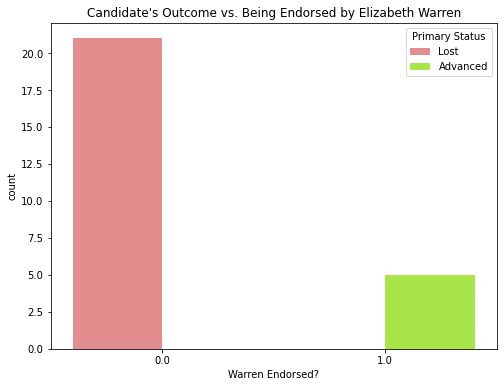

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(data=dems, x='Warren Endorsed?', hue='Primary Status', palette=colours)
plt.title("Candidate's Outcome vs. Being Endorsed by Elizabeth Warren");

All Warren-endorsed candidates advanced, and all Warren-anti-endorsed or candidates running against a Warren-endorsed candidate lost.

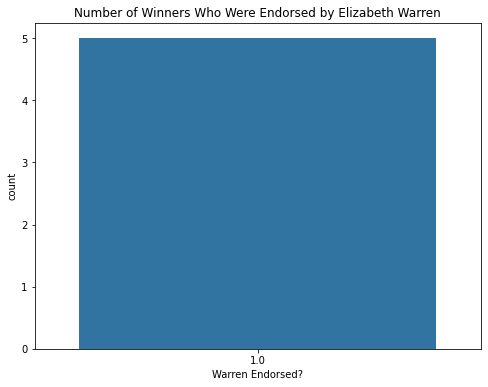

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(data=winners, x='Warren Endorsed?')
plt.title("Number of Winners Who Were Endorsed by Elizabeth Warren");

## Emily's List

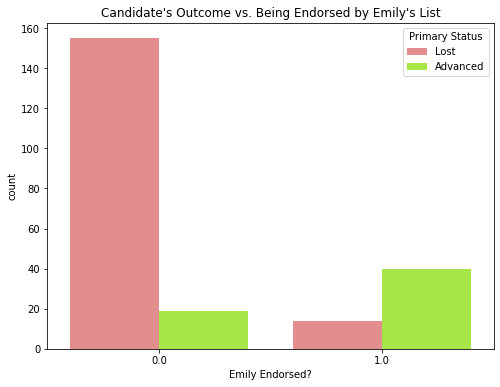

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(data=dems, x='Emily Endorsed?', hue='Primary Status', palette=colours)
plt.title("Candidate's Outcome vs. Being Endorsed by Emily's List");

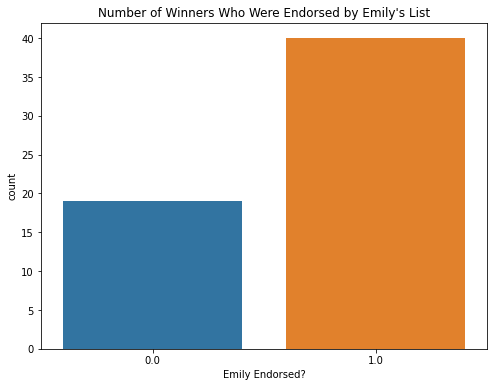

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(data=winners, x='Emily Endorsed?')
plt.title("Number of Winners Who Were Endorsed by Emily's List");

## Our Revolution

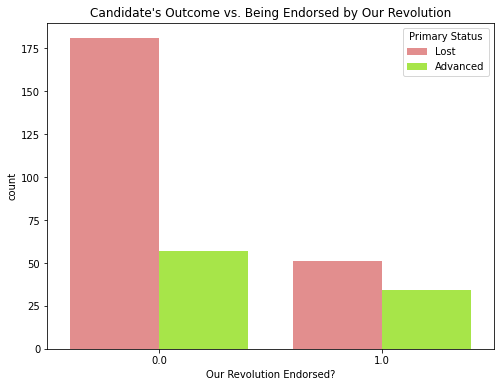

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(data=dems, x='Our Revolution Endorsed?', hue='Primary Status', palette=colours)
plt.title("Candidate's Outcome vs. Being Endorsed by Our Revolution");

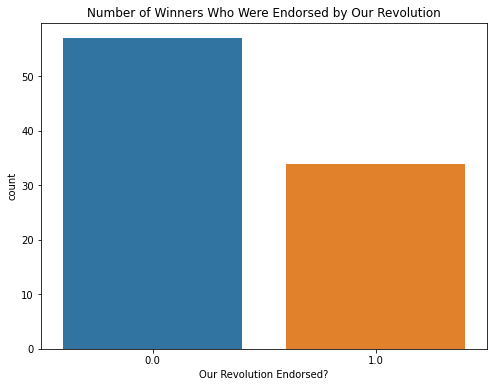

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(data=winners, x='Our Revolution Endorsed?')
plt.title("Number of Winners Who Were Endorsed by Our Revolution");

## Justice Dems

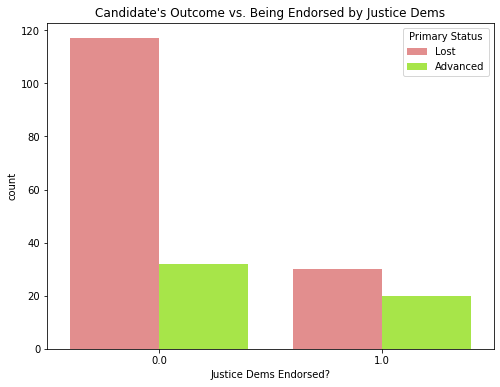

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(data=dems, x='Justice Dems Endorsed?', hue='Primary Status', palette=colours)
plt.title("Candidate's Outcome vs. Being Endorsed by Justice Dems");

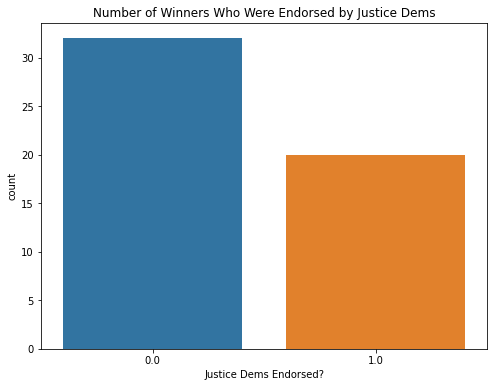

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(data=winners, x='Justice Dems Endorsed?')
plt.title("Number of Winners Who Were Endorsed by Justice Dems");

## PCCC

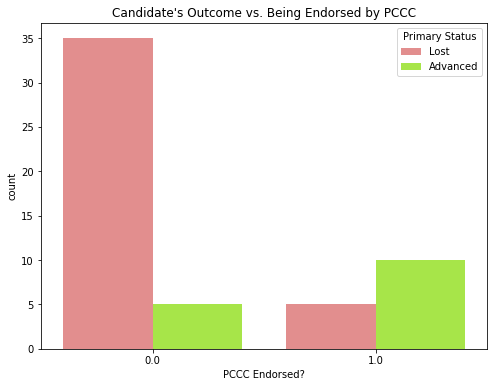

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(data=dems, x='PCCC Endorsed?', hue='Primary Status', palette=colours)
plt.title("Candidate's Outcome vs. Being Endorsed by PCCC");

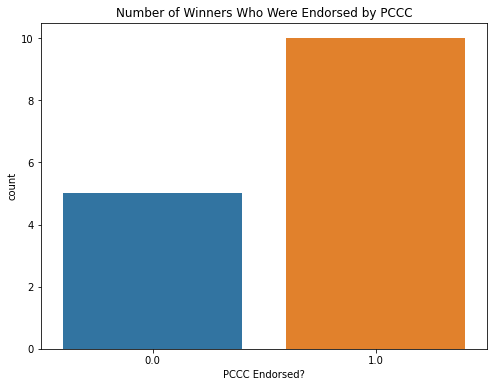

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(data=winners, x='PCCC Endorsed?')
plt.title("Number of Winners Who Were Endorsed by PCCC");

## Indivisible

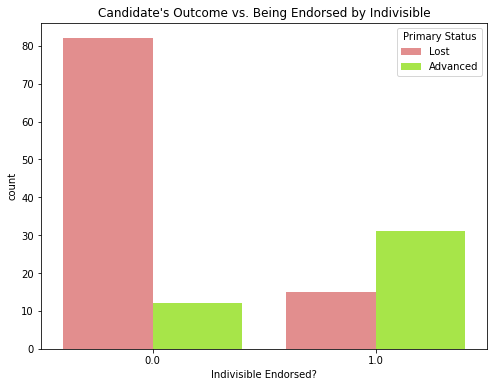

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(data=dems, x='Indivisible Endorsed?', hue='Primary Status', palette=colours)
plt.title("Candidate's Outcome vs. Being Endorsed by Indivisible");

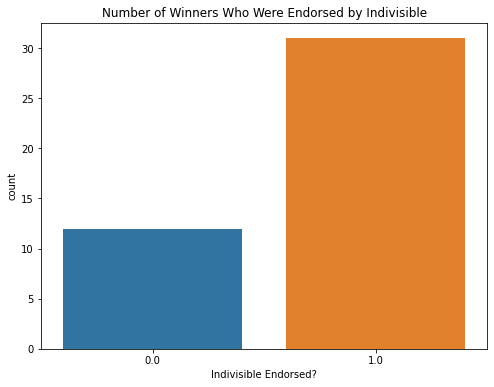

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(data=winners, x='Indivisible Endorsed?')
plt.title("Number of Winners Who Were Endorsed by Indivisible");

## WFP

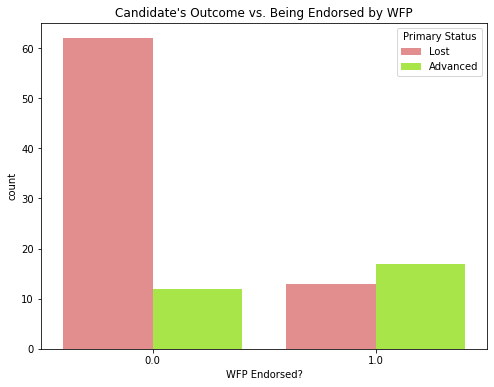

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(data=dems, x='WFP Endorsed?', hue='Primary Status', palette=colours)
plt.title("Candidate's Outcome vs. Being Endorsed by WFP");

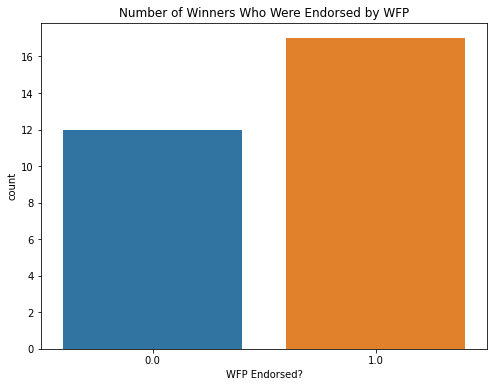

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(data=winners, x='WFP Endorsed?')
plt.title("Number of Winners Who Were Endorsed by WFP");

## VoteVets

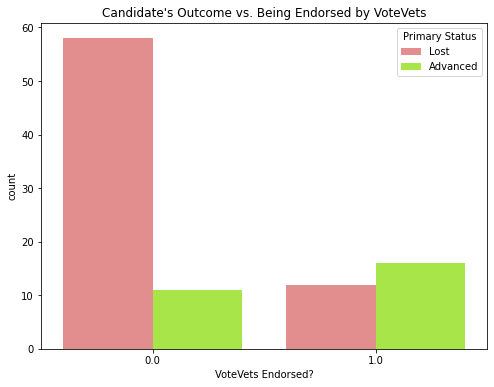

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(data=dems, x='VoteVets Endorsed?', hue='Primary Status', palette=colours)
plt.title("Candidate's Outcome vs. Being Endorsed by VoteVets");

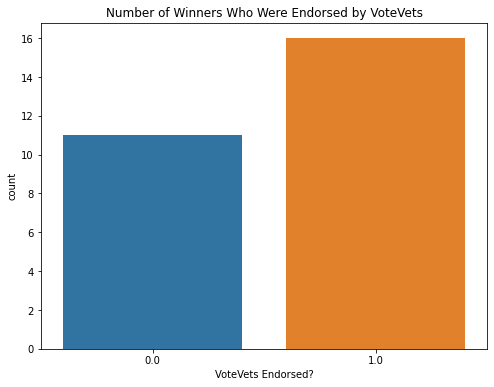

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(data=winners, x='VoteVets Endorsed?')
plt.title("Number of Winners Who Were Endorsed by VoteVets");

## Gun Sense

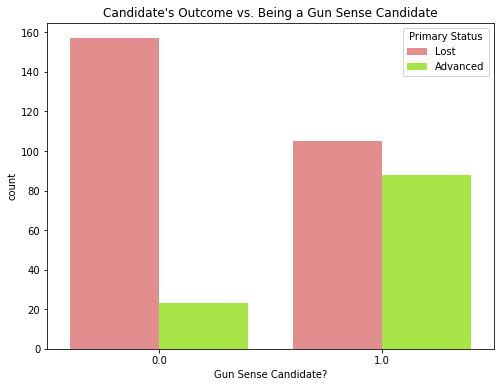

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(data=dems, x='Gun Sense Candidate?', hue='Primary Status', palette=colours)
plt.title("Candidate's Outcome vs. Being a Gun Sense Candidate");

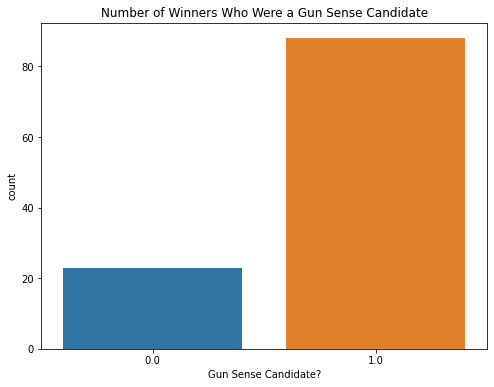

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(data=winners, x='Gun Sense Candidate?')
plt.title("Number of Winners Who Were a Gun Sense Candidate");

## Obama Alum

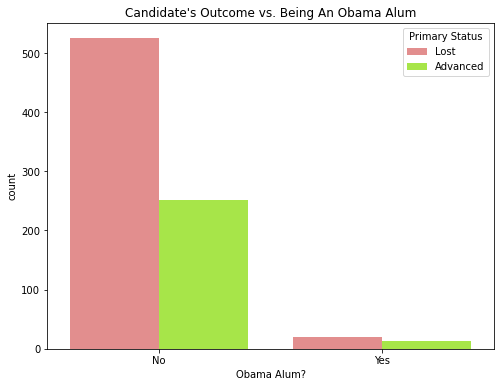

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(data=dems, x='Obama Alum?', hue='Primary Status', palette=colours)
plt.title("Candidate's Outcome vs. Being An Obama Alum");

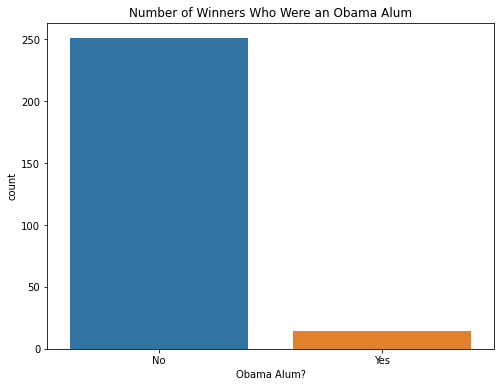

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(data=winners, x='Obama Alum?')
plt.title("Number of Winners Who Were an Obama Alum");

## No Labels

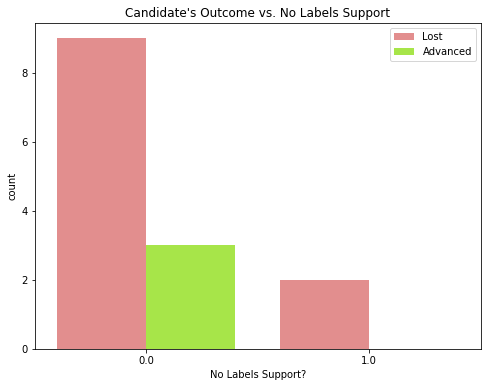

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(data=dems, x='No Labels Support?', hue='Primary Status', palette=colours)
plt.title("Candidate's Outcome vs. No Labels Support")
plt.legend(loc='upper right');

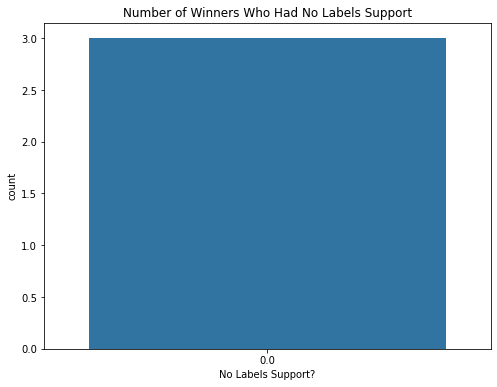

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(data=winners, x='No Labels Support?')
plt.title("Number of Winners Who Had No Labels Support");

Assumptions:
- Assume representative samples
- Partisan Lean represents what we expect the voting distribution to look like